In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


<Axes: xlabel='date'>

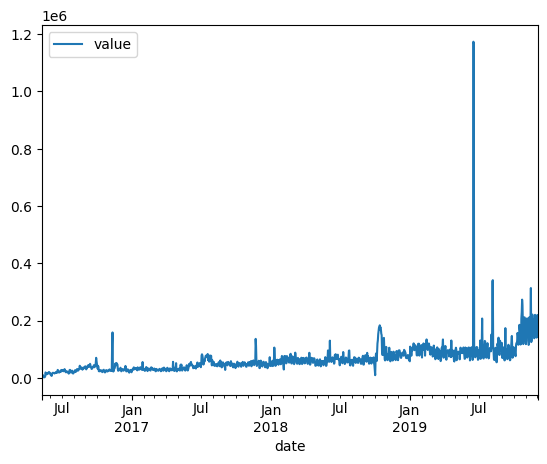

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot()

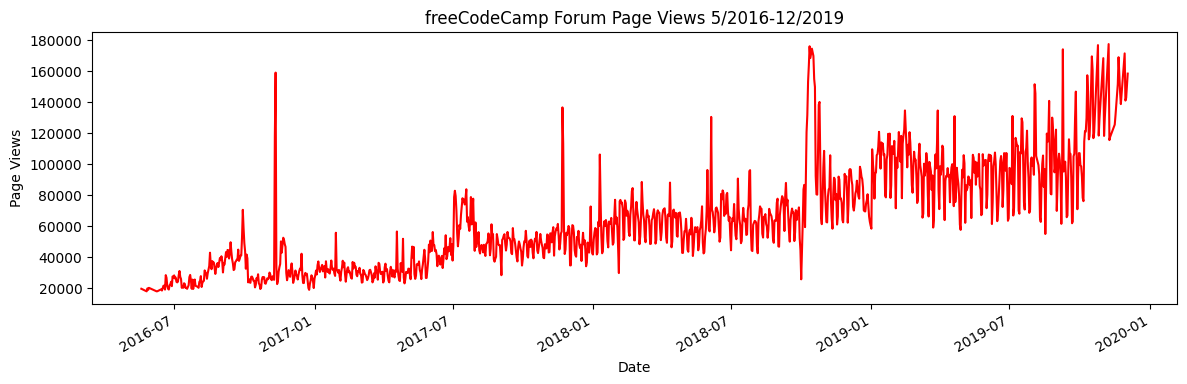

In [4]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df.plot(figsize=(14,4), 
title='freeCodeCamp Forum Page Views 5/2016-12/2019',
color= 'red',
ylabel= 'Page Views',
xlabel='Date')

# Remove the legend
plt.gca().get_legend().remove()


In [5]:
# Extract year and month from the 'date' column
df_bar = df.copy()

df_bar['year'] = df.index.year
df_bar['month'] = df.index.strftime('%B')  # Get month name
df_bar['month_num'] = df.index.month  # Get month number for sorting


df_bar

,value,year,month,month_num
date,,,,
2016-05-19,19736,2016,May,5
2016-05-26,18060,2016,May,5
2016-05-27,19997,2016,May,5
2016-05-28,19044,2016,May,5
2016-05-29,20325,2016,May,5
...,...,...,...,...
2019-11-24,138875,2019,November,11
2019-11-29,171584,2019,November,11
2019-11-30,141161,2019,November,11


In [18]:
pd.pivot?

Signature:
pd.pivot(
    data: 'DataFrame',
    *,
    columns: 'IndexLabel',
    index: 'IndexLabel | lib.NoDefault' = typing.Literal[<no_default>],
    values: 'IndexLabel | lib.NoDefault' = typing.Literal[<no_default>],
) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
data : DataFrame
columns : str or object or a list of str
    Column to use to make new frame's columns.

    .. versionchanged:: 1.1.0
       Also accept list of columns names.

index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.

    .. versionchange

In [23]:
import calendar
months_full = list(calendar.month_name)[1:]

Text(0.5, 1.0, 'Average Daily Page Views for Each Month Grouped by Year')

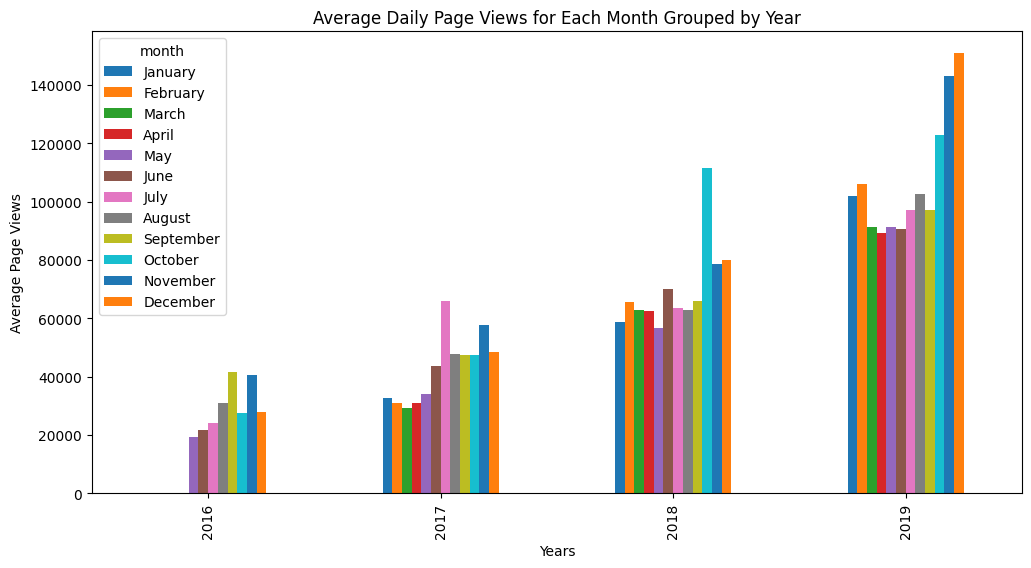

In [24]:
# Group by year and month and calculate the average page views
df_grouped = df_bar.groupby(['year', 'month', 'month_num'])['value'].mean().reset_index()


# Sort by year and month number
df_grouped.sort_values(by=['month_num'], inplace=True)

# Pivot the table for plotting
df_grouped = df_grouped.pivot(index='year', columns='month', values='value')



df_grouped = df_grouped[months_full]


 # Plotting
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', ax=ax)

# Set the labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.set_title('Average Daily Page Views for Each Month Grouped by Year')





In [55]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]


df_box

,date,value,year,month,month_num
0,2016-05-19,19736,2016,May,5
1,2016-05-26,18060,2016,May,5
2,2016-05-27,19997,2016,May,5
3,2016-05-28,19044,2016,May,5
4,2016-05-29,20325,2016,May,5
...,...,...,...,...,...
1233,2019-11-24,138875,2019,Nov,11
1234,2019-11-29,171584,2019,Nov,11
1235,2019-11-30,141161,2019,Nov,11
1236,2019-12-01,142918,2019,Dec,12


In [1]:
print(sns.__version__)

NameError: name 'sns' is not defined

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

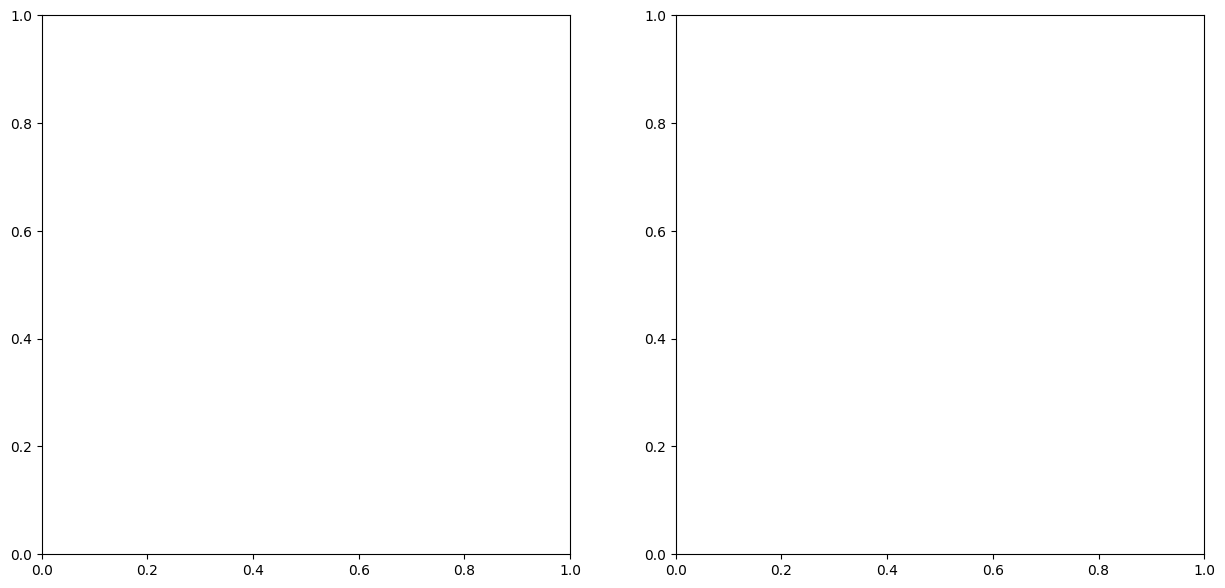

In [67]:
# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Year-wise box plot (Trend)
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
